In [1]:
from data import Data
from methods import MABMethod
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from generateToyData import gen_simple_data

seed = 331
bags, bags_labels, X_inst, y_inst=gen_simple_data(k = 35, nbags = 2, bag_contfactor = 0.3, seed = seed)

In [3]:
from dataBag import DataBag

dataBag = DataBag(bags, X_inst, y_inst)

(25, 2)


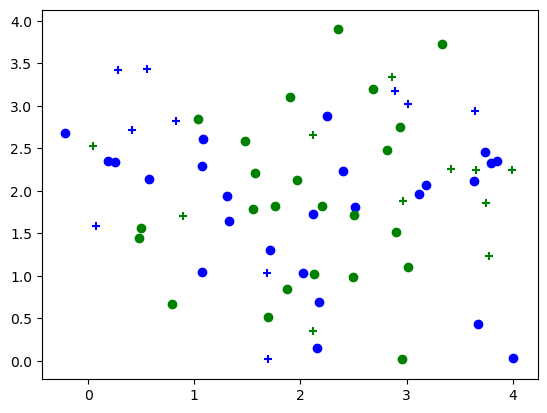

In [4]:
## Create toy data set
domain_1 = bags[0]
domain_2 = bags[1]
anomalies_1 = []
anomalies_2 = []
normals_1 = []
normals_2 = []

for i in range(len(domain_1)):
    if dataBag.isAnomaly(0,i):
        anomalies_1.append(domain_1[i])
    else:
        normals_1.append(domain_1[i])

for i in range(len(domain_2)):
    if dataBag.isAnomaly(1,i):
        anomalies_2.append(domain_2[i])
    else:
        normals_2.append(domain_2[i])

anomalies_1 = np.asarray(anomalies_1)
anomalies_2 = np.asarray(anomalies_2)
normals_1 = np.asarray(normals_1)
normals_2 = np.asarray(normals_2)
print(normals_1.shape)


fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
if (len(normals_1)>0):
    ax.scatter(normals_1[:,0], normals_1[:,1], c= 'b')
if (len(normals_2)>0):
    ax.scatter(normals_2[:,0], normals_2[:,1], c= 'g')
if (len(anomalies_1)>0):
    ax.scatter(anomalies_1[:,0], anomalies_1[:,1], c= 'b', marker='+')
if (len(anomalies_2)>0):
    ax.scatter(anomalies_2[:,0], anomalies_2[:,1], c= 'g', marker='+')
fig.savefig('img/original.png',bbox_inches='tight')
plt.show()
plt.close(fig)


In [5]:
def getPrediction(alba: MABMethod, data: Data):
    pos = {}
    neg = {}
    predictions = alba.predict(data)
    for key in predictions.keys():
        posdummy = []
        negdummy = []
        for i in range(len(predictions[key])):
            if predictions[key][i]==-1:
                negdummy.append(data.get_domain(key)[i])
            elif predictions[key][i]==1:
                posdummy.append(data.get_domain(key)[i])
        pos[key] = np.asarray(posdummy)
        neg[key] = np.asarray(negdummy)
    return neg, pos, predictions
def currentPrediction(alba, data, labeledPos = None, labeledNeg = None, t=0):
    neg, pos, predicitons = getPrediction(alba, data)
    neg_1, neg_2 = neg.values()
    pos_1, pos_2 = pos.values()
    fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
    if (len(neg_1)>0):
        ax.scatter(neg_1[:,0], neg_1[:,1], c= 'b')
    if (len(neg_2)>0):
        ax.scatter(neg_2[:,0], neg_2[:,1], c= 'g')
    if (len(pos_1)>0):
        ax.scatter(pos_1[:,0], pos_1[:,1], c= 'b', marker='+')
    if (len(pos_2)>0):
        ax.scatter(pos_2[:,0], pos_2[:,1], c= 'g', marker='+')
    if (len(labeledPos)>0):
        ax.scatter(labeledPos[:,0], labeledPos[:,1], c = 'r', marker = '+')
    if (len(labeledNeg)>0):
        ax.scatter(labeledNeg[:,0], labeledNeg[:,1], c = 'r', marker = 'o')
    fig.savefig('img/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)

    return predicitons

In [6]:
## Create 2 domains
training_data = Data(2)
training_data.set_domains_and_labels({0:domain_1, 1:domain_2})
query_budget = 70
alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True )


In [7]:
from random import shuffle

t = 0  
labeledPos = []
labeledNeg = []
performance = []

import warnings
warnings.filterwarnings('ignore')

while(t<query_budget):
    queries = alba.fit_query(training_data, True)
    shuffle(queries)

    #!!!!!!!
    key,idx = queries[0]
    i = 0
    while dataBag.isLabeled(key,idx):
        i+=1
        key, idx = queries[i]
        

    key,idx = queries[i]
    instance = training_data.get_domain(key)[idx]
    lbl = dataBag.getLabel(key, idx)
    training_data.set_new_label(key, idx, lbl)
    training_data.set_last_labeled(key,idx)
    dataBag.label(key,idx)
    if (lbl == 1):
        labeledPos.append(instance)
    else:
        labeledNeg.append(instance)


    predictions = currentPrediction(alba, training_data, np.asarray(labeledPos), np.asarray(labeledNeg), t)
    
    performance.append(dataBag.measureAccuracy(predictions))

    t += 1

OrderedDict([(0, array([-1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1])), (1, array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1]))])
label: 1
prediction: -1
label: 1
prediction: -1
label: 1
prediction: -1
label: 1
prediction: -1
label: 1
prediction: 1
label: 1
prediction: -1
label: 1
prediction: -1
label: 1
prediction: 1
label: 1
prediction: 1
label: 1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
prediction: -1
label: -1
pre

In [8]:
import cv2
import os

image_folder = 'img'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
print(images)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

['iteration000.png', 'iteration001.png', 'iteration002.png', 'iteration003.png', 'iteration004.png', 'iteration005.png', 'iteration006.png', 'iteration007.png', 'iteration008.png', 'iteration009.png', 'iteration010.png', 'iteration011.png', 'iteration012.png', 'iteration013.png', 'iteration014.png', 'iteration015.png', 'iteration016.png', 'iteration017.png', 'iteration018.png', 'iteration019.png', 'iteration020.png', 'iteration021.png', 'iteration022.png', 'iteration023.png', 'iteration024.png', 'iteration025.png', 'iteration026.png', 'iteration027.png', 'iteration028.png', 'iteration029.png', 'iteration030.png', 'iteration031.png', 'iteration032.png', 'iteration033.png', 'iteration034.png', 'iteration035.png', 'iteration036.png', 'iteration037.png', 'iteration038.png', 'iteration039.png', 'iteration040.png', 'iteration041.png', 'iteration042.png', 'iteration043.png', 'iteration044.png', 'iteration045.png', 'iteration046.png', 'iteration047.png', 'iteration048.png', 'iteration049.png',

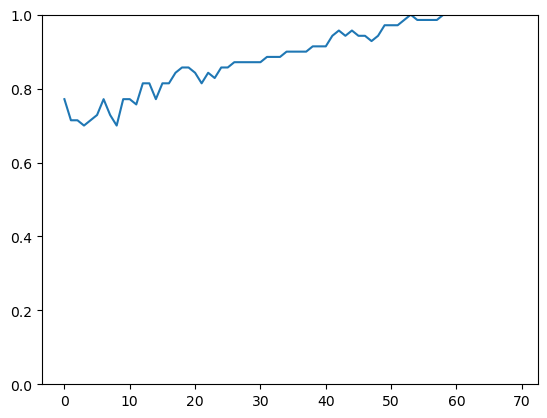

In [9]:
plt.plot(performance)
plt.ylim([0,1])
plt.show()